In [7]:
!pip install opencv-python

In [24]:
import requests  # Importing the 'requests' library to handle HTTP requests
import cv2  # Importing OpenCV for image processing
import numpy as np  # Importing NumPy for numerical operations (like Singular Value Decomposition)
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting, though it's not used in the current code

url = 'https://images.unsplash.com/photo-1731612812235-dc191e5ff4ad?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'  # URL of the image to download

response = requests.get(url, stream=True)  # Sending an HTTP GET request to the URL, streaming the response content

with open('image.png', 'wb') as f:  # Opening the file 'image.png' in write-binary mode
    f.write(response.content)  # Writing the response content (image data) to the file

img = cv2.imread('image.png')  # Reading the saved image using OpenCV's imread function

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converting the image from BGR to grayscale

u, s, v = np.linalg.svd(gray_image, full_matrices=False)  # Performing Singular Value Decomposition (SVD) on the grayscale image

print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')  # Printing the shapes of the SVD matrices

u.shape:(2831, 1887),s.shape:(1887,),v.shape:(1887, 1887)


variance Explained by Top 20 singular values:
[9.03653e-01 2.86610e-02 1.08450e-02 7.22100e-03 3.62100e-03 3.54300e-03
 2.86100e-03 2.12000e-03 1.93700e-03 1.53100e-03 1.29900e-03 1.17800e-03
 1.07200e-03 9.03000e-04 8.72000e-04 7.78000e-04 7.34000e-04 7.03000e-04
 6.74000e-04 6.11000e-04]


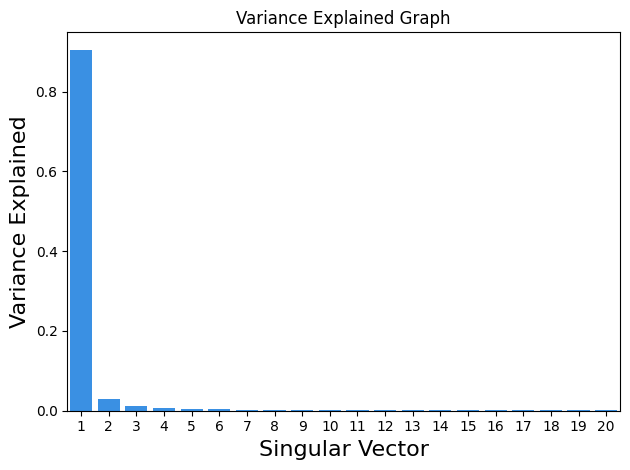

In [17]:
import seaborn as sns  # Importing Seaborn for advanced visualization (specifically for creating the bar plot)

var_explained = np.round(s**2/np.sum(s**2), decimals=6)  # Calculating the variance explained by each singular value

print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x=list(range(1, 21)),  # Creating a bar plot of the variance explained by the top 20 singular values
            y=var_explained[0:20], color="dodgerblue")  # 'x' is the range from 1 to 20 (for the first 20 singular values), 'y' is the variance explained

plt.title('Variance Explained Graph')  # Setting the title of the plot
plt.xlabel('Singular Vector', fontsize=16)  # Labeling the x-axis, which represents the singular vectors (1 to 20)
plt.ylabel('Variance Explained', fontsize=16)  # Labeling the y-axis, which represents the variance explained by each singular vector
plt.tight_layout()  # Ensuring that the layout of the plot fits within the figure area, avoiding overlap
plt.show()  # Displaying the plot

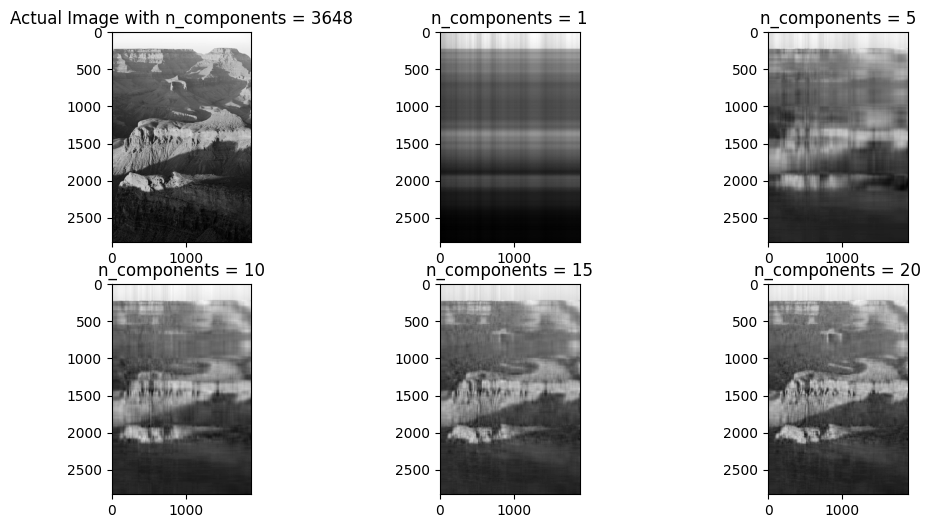

In [23]:
comps = [3648, 1, 5, 10, 15, 20]# Defining the list of components to use for low-rank approximation (number of singular values to keep)
plt.figure(figsize=(12, 6)) # Creating a figure with a size of 12x6 inches for the subplots

for i in range(len(comps)): # Looping through the list of components
	low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]  # Reconstructing the image using the first 'comps[i]' singular values

	if(i == 0): # If it's the first iteration (comps[i] = 3648, i.e., the original image)
		plt.subplot(2, 3, i+1), # Create the first subplot in a 2x3 grid (2 rows, 3 columns)
		plt.imshow(low_rank, cmap='gray'), # Display the low-rank approximation in grayscale
		plt.title(f'Actual Image with n_components = {comps[i]}') # Add title indicating the number of components

	else: # For all other iterations, where the image is being reconstructed with fewer components
		plt.subplot(2, 3, i+1), # Create the next subplot in the 2x3 grid
		plt.imshow(low_rank, cmap='gray'), # Display the low-rank approximation in grayscale
		plt.title(f'n_components = {comps[i]}') # Add title indicating the number of components used for approximation
